# Results

In [1]:
import torch
from full_model import PortfolioOptimizer

device = torch.device("cpu")

In [2]:
tickers = ['MSFT', 'V', 'AMZN']
portfolio_optimizer = PortfolioOptimizer(tickers, device)
portfolio_optimizer.get_data()
portfolio_optimizer.construct_features()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Before preprocessing:
Number of samples: 733
Number of features: 6

After preprocessing:
Number of samples: 715
Number of features: 14
Number of testing days: 72


## Equal Allocations

In [3]:
portfolio_optimizer.set_method('equal')
portfolio_optimizer.train()

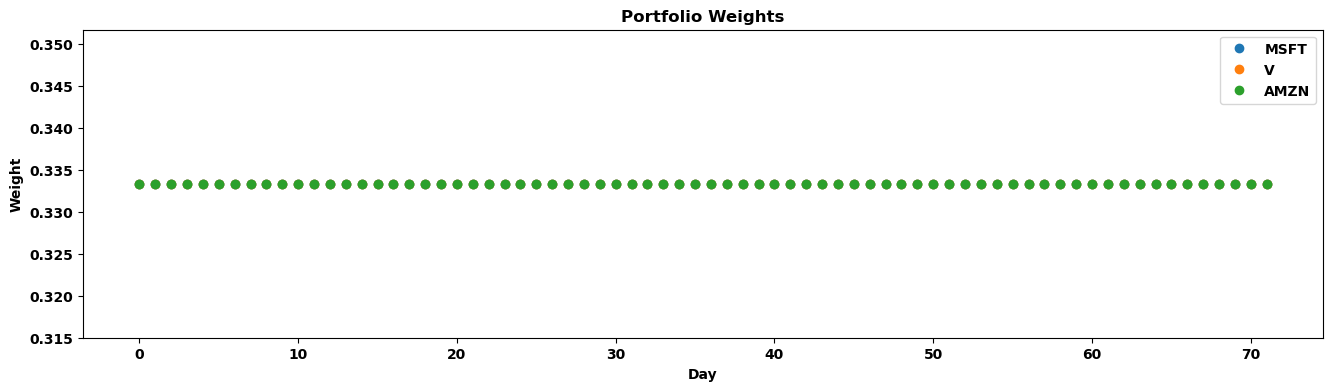

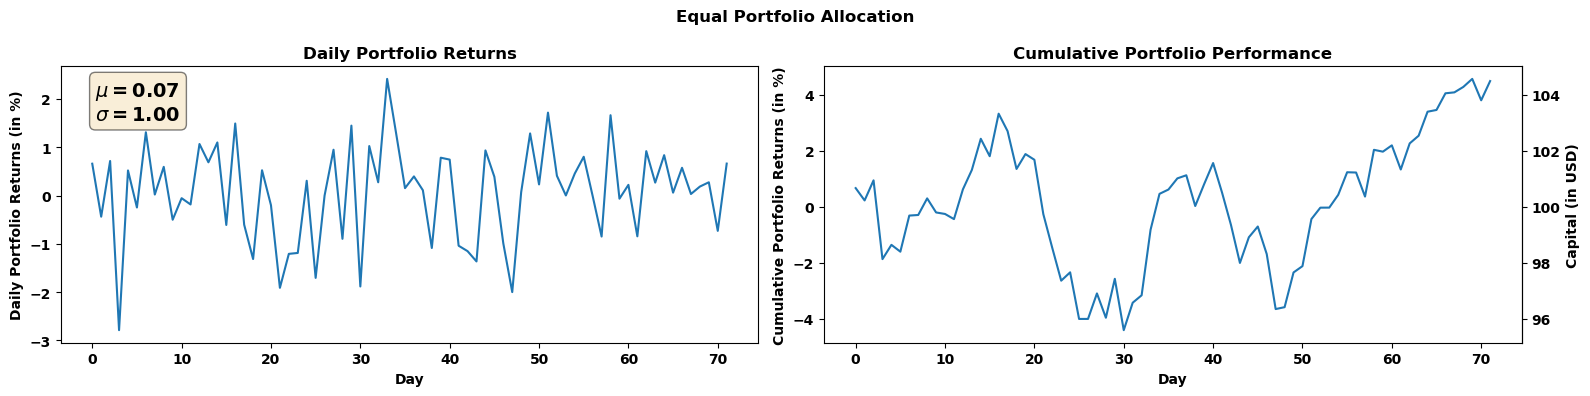

In [4]:
portfolio_optimizer.plot_portfolio_performance()

## Random Allocations

In [5]:
portfolio_optimizer.set_method('random')
portfolio_optimizer.train()

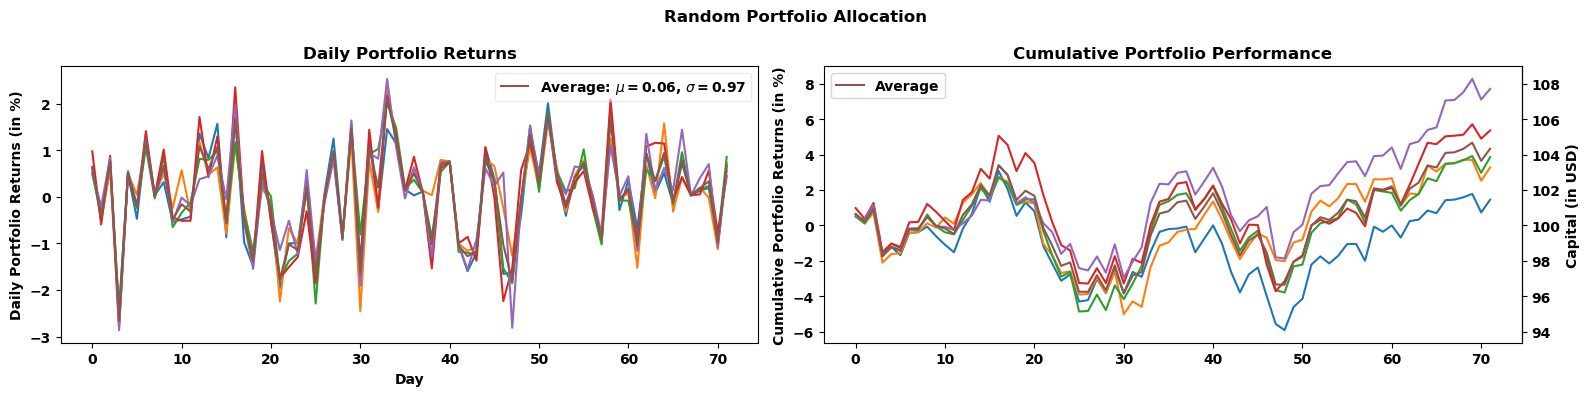

In [6]:
reps = 5
portfolio_optimizer.plot_multiple_random_portfolio_performance(reps)

## LSTM Regression + Markowitz Mean-Variance Model


Cross validating for MSFT...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  9.9min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 11.3min finished



Best parameters: ws = 10, batch size = 64, hid = 32, lr = 0.0001, epochs = 400
Lowest average error: 0.01587100178003311 


Cross validating for V...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  9.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 11.2min finished



Best parameters: ws = 3, batch size = 64, hid = 32, lr = 0.0001, epochs = 400
Lowest average error: 0.012673346884548664 


Cross validating for AMZN...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed: 10.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 11.8min finished



Best parameters: ws = 3, batch size = 64, hid = 32, lr = 0.0001, epochs = 400
Lowest average error: 0.019680925644934177 



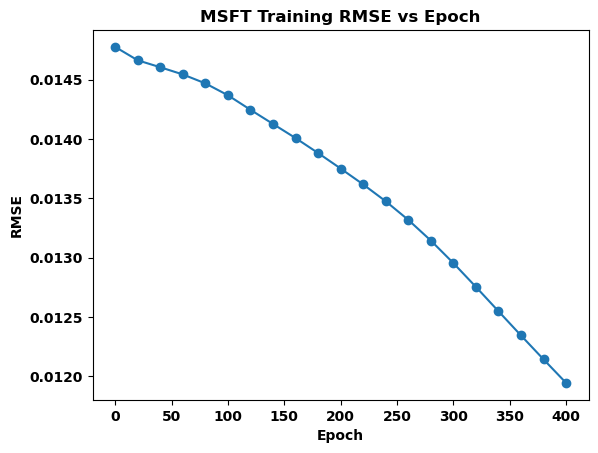

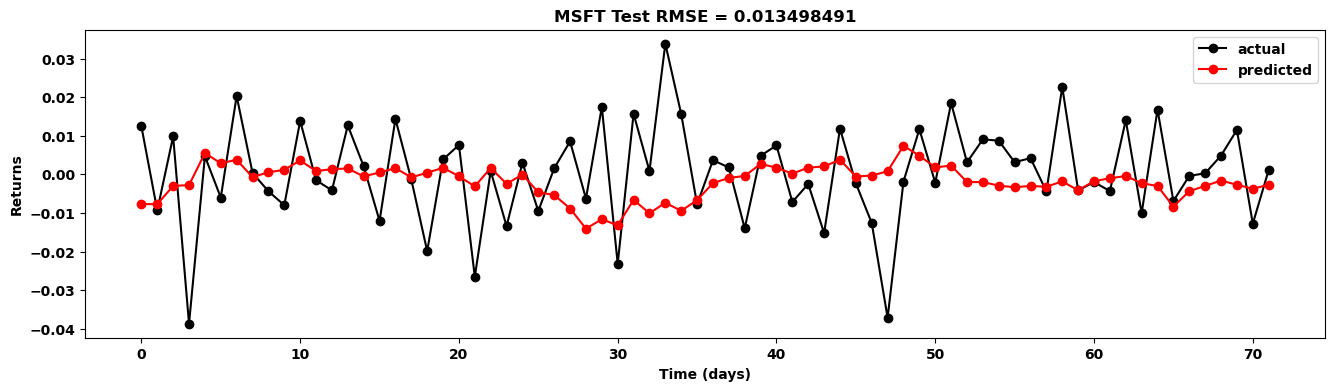

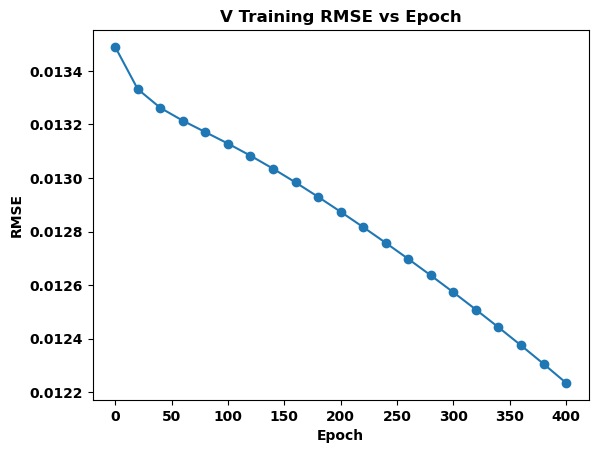

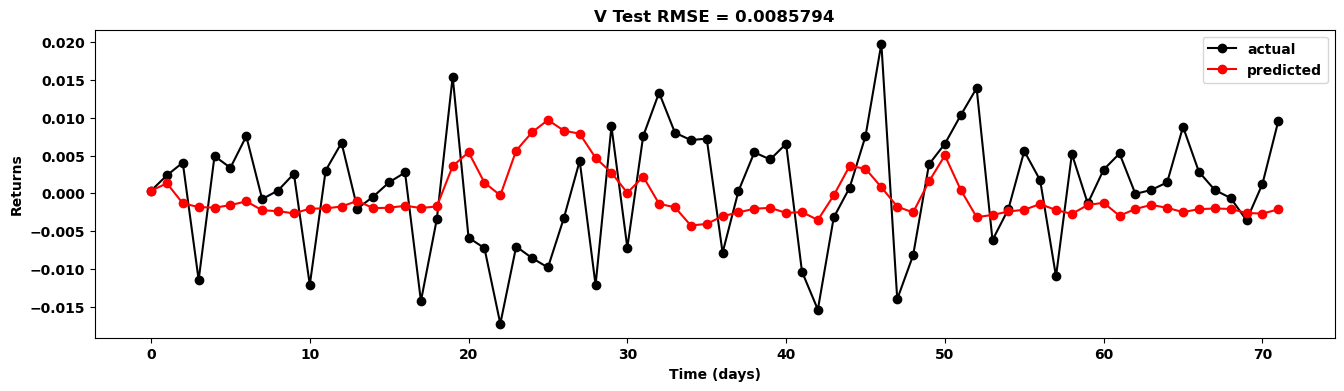

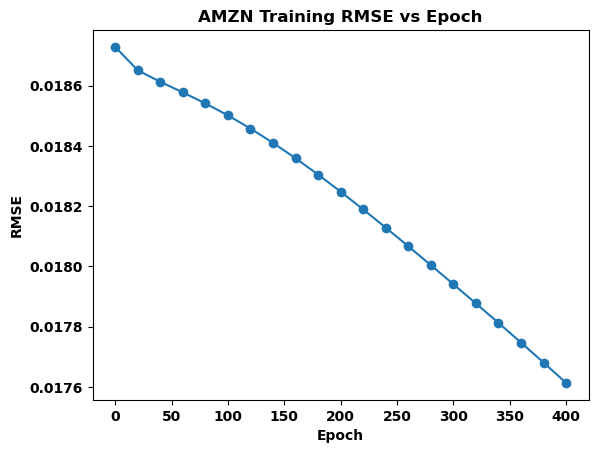

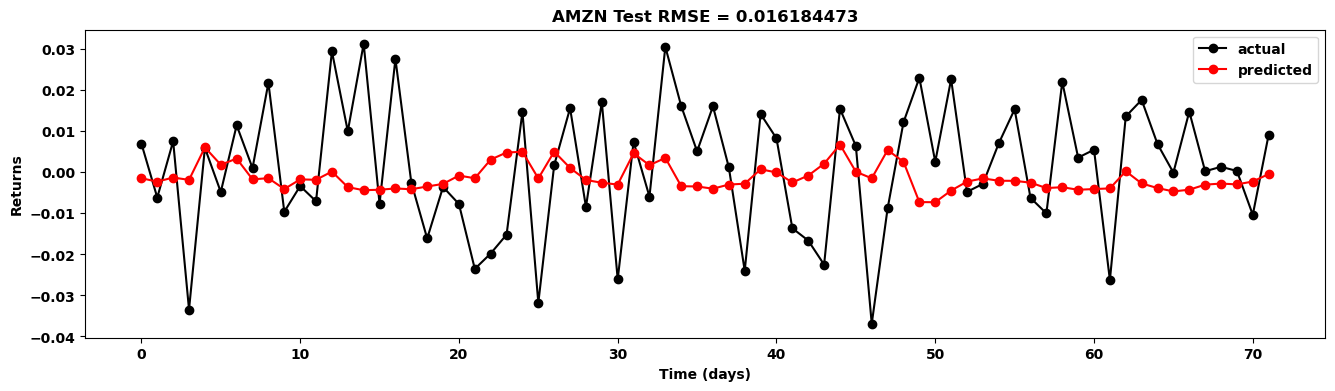

In [7]:
portfolio_optimizer.set_method('regression')
portfolio_optimizer.train()

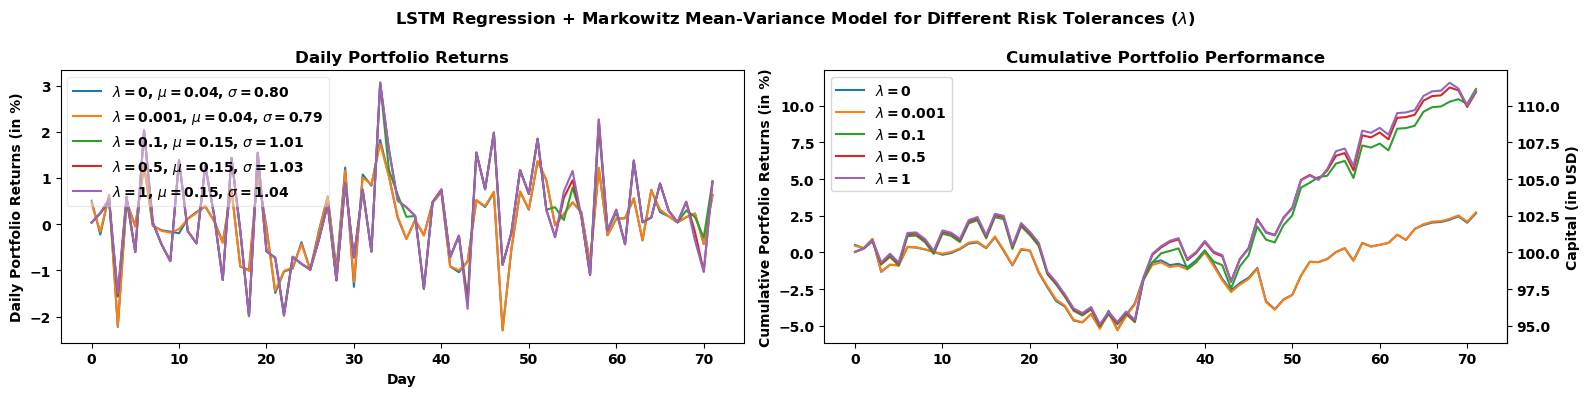

In [8]:
risk_tolerances = [0, 0.001, 0.1, 0.5, 1]
portfolio_optimizer.plot_multiple_regression_portfolio_performance(risk_tolerances)

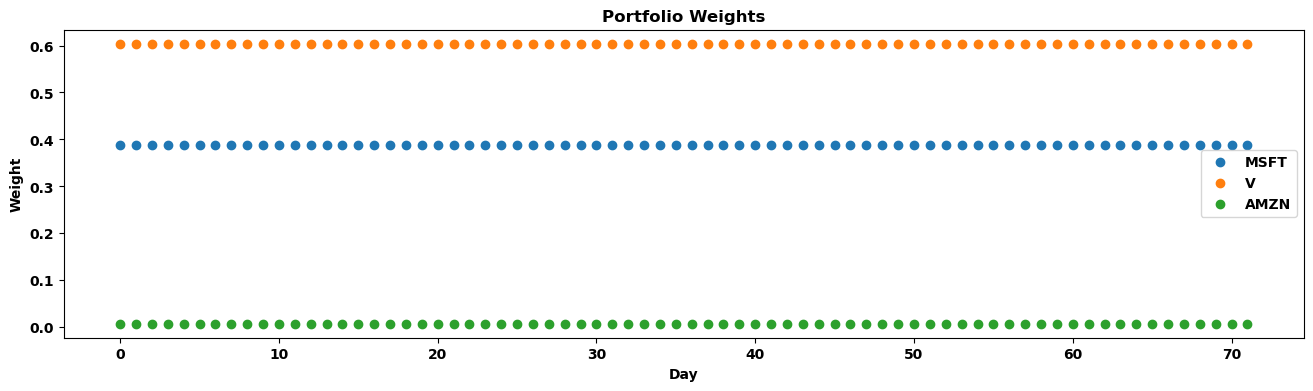

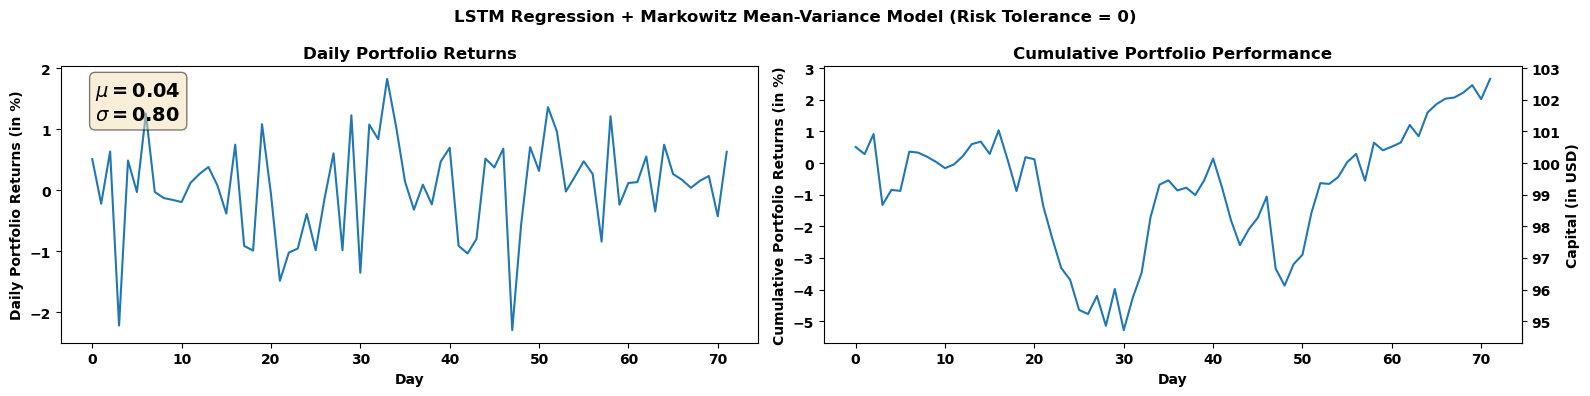

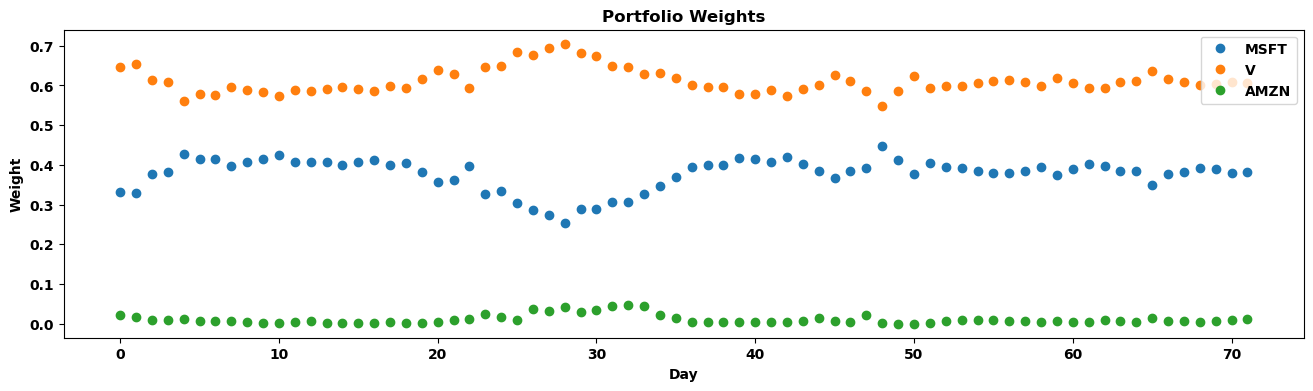

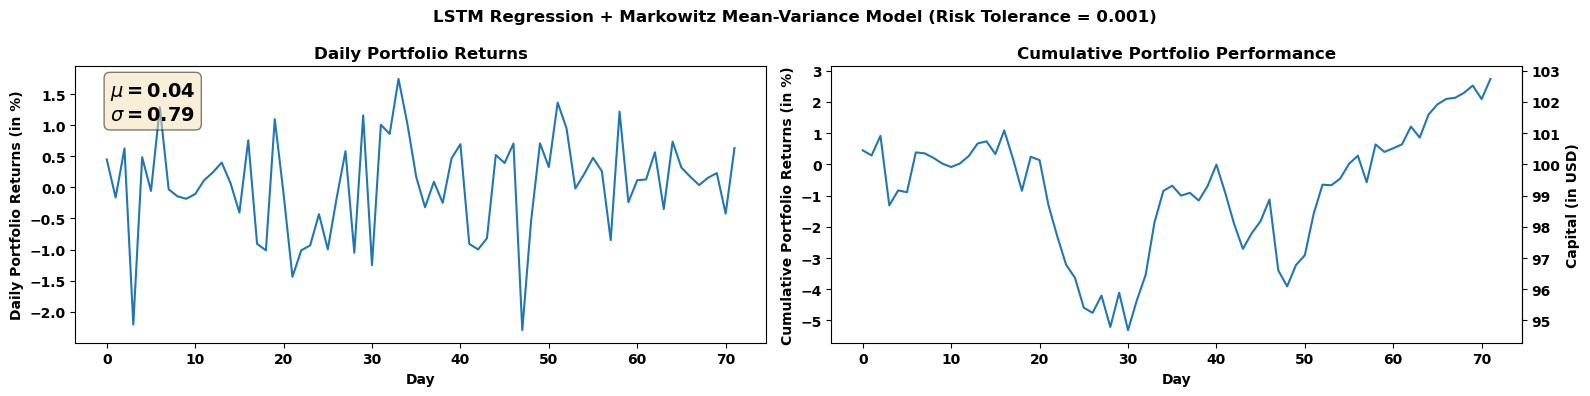

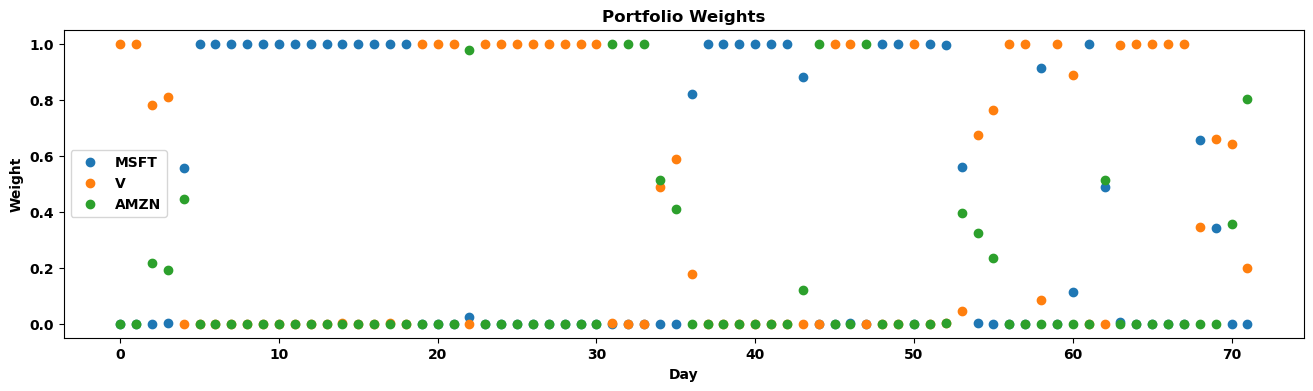

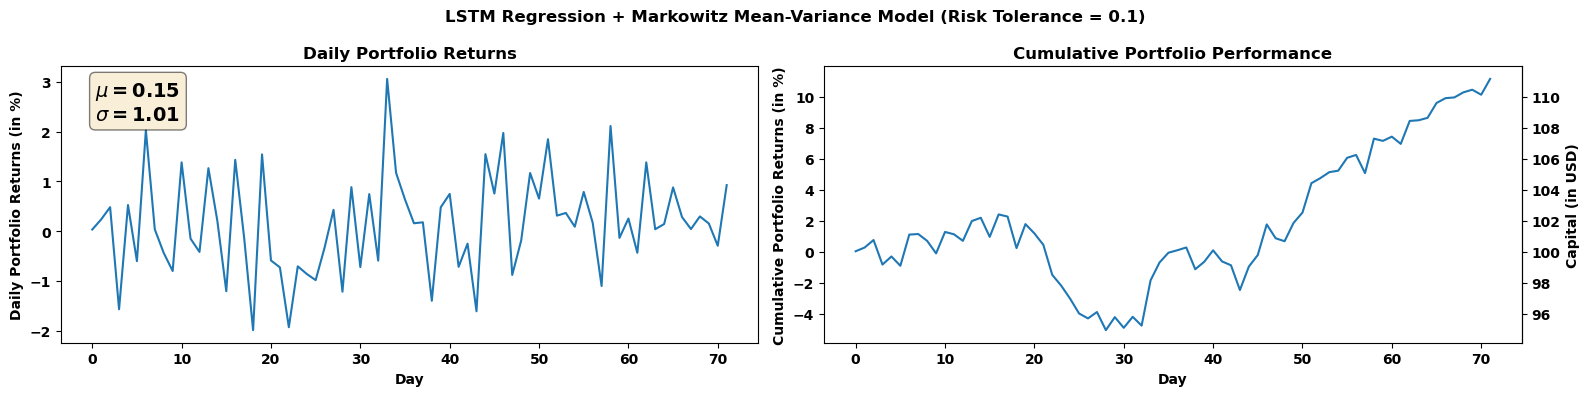

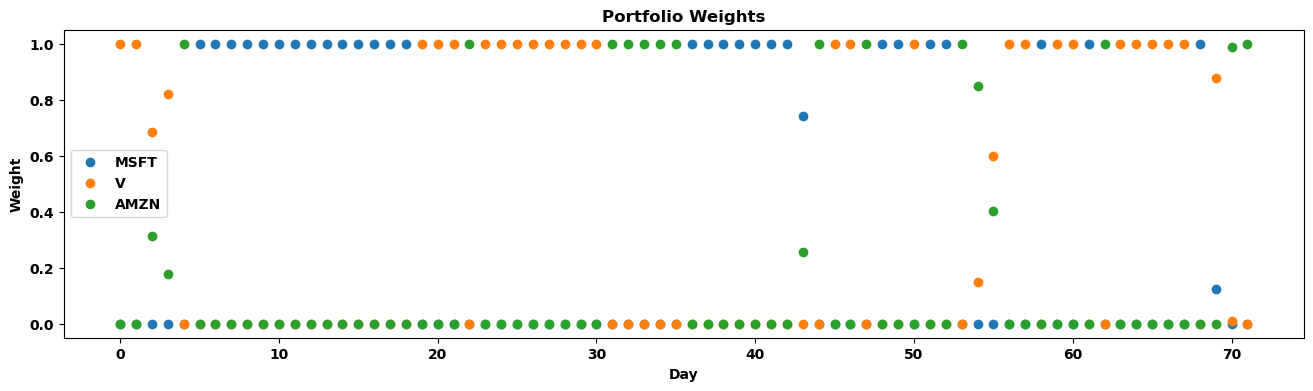

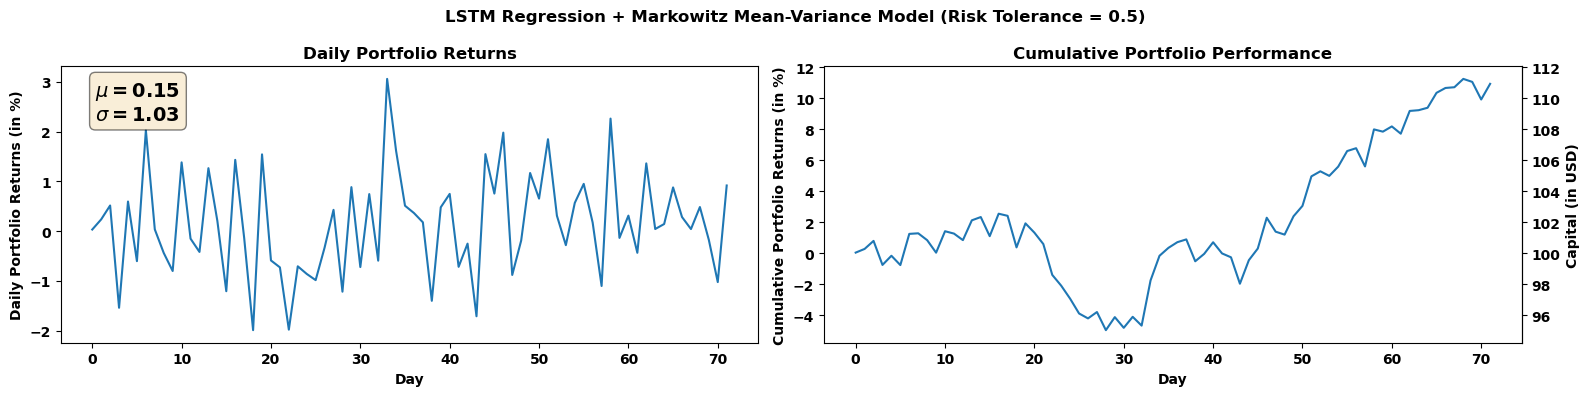

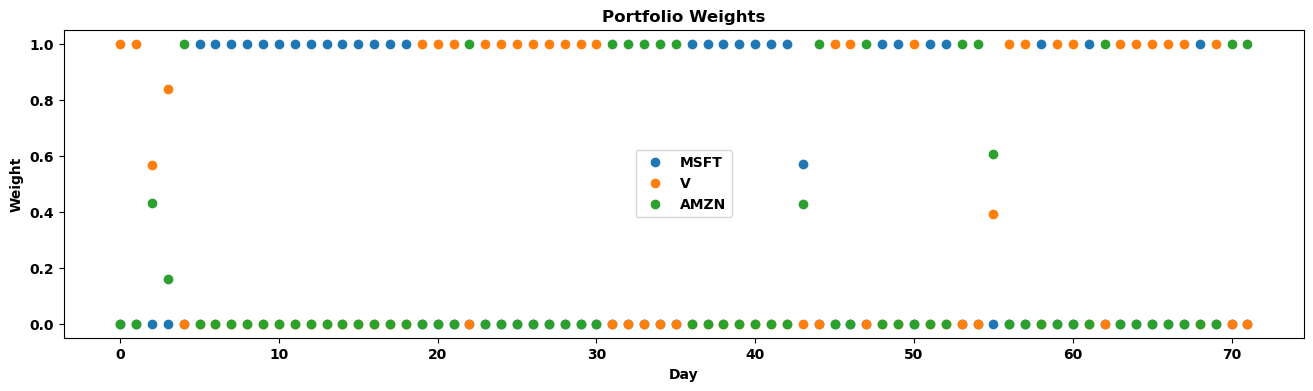

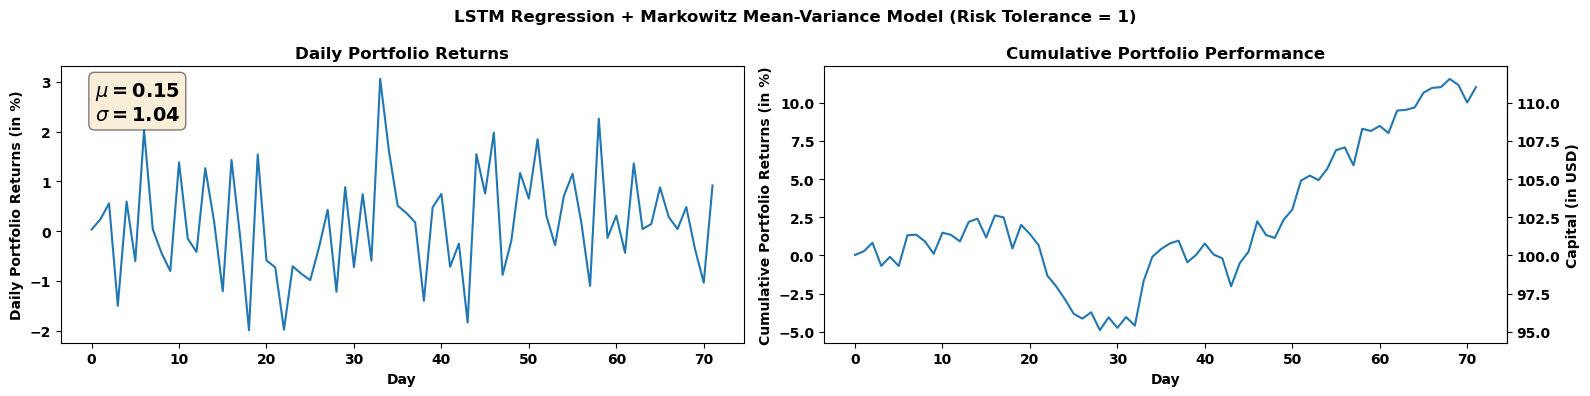

In [9]:
for risk_tolerance in risk_tolerances:
    portfolio_optimizer.set_risk_tolerance(risk_tolerance)
    portfolio_optimizer.plot_portfolio_performance()

## Classifier


Cross validating for classification...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed: 10.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 12.2min finished



Best parameters: ws = 10, batch size = 64, hid = 64, lr = 0.001, epochs = 400
Highest average accuracy: 0.5230769230769231 

Test Cross Entropy Loss: 4.850369930267334
Testing accuracy: 0.4444444444444444
[[ 5 11  9]
 [ 4 14  6]
 [ 5  5 13]]
              precision    recall  f1-score   support

           0       0.36      0.20      0.26        25
           1       0.47      0.58      0.52        24
           2       0.46      0.57      0.51        23

    accuracy                           0.44        72
   macro avg       0.43      0.45      0.43        72
weighted avg       0.43      0.44      0.42        72



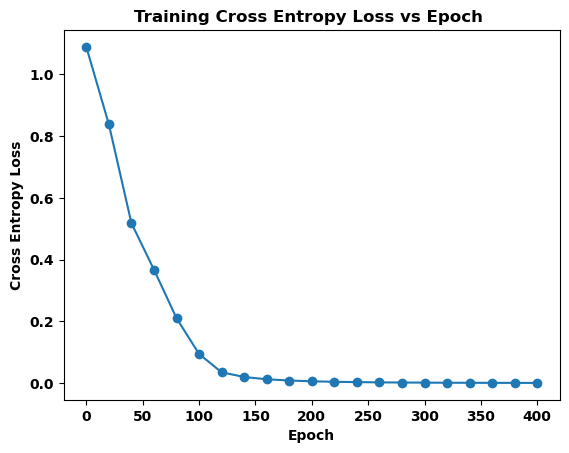

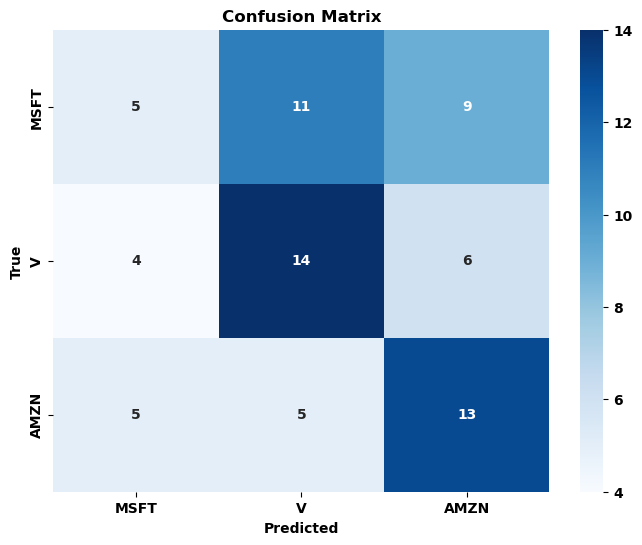

In [10]:
portfolio_optimizer.set_method('classification')
portfolio_optimizer.train()

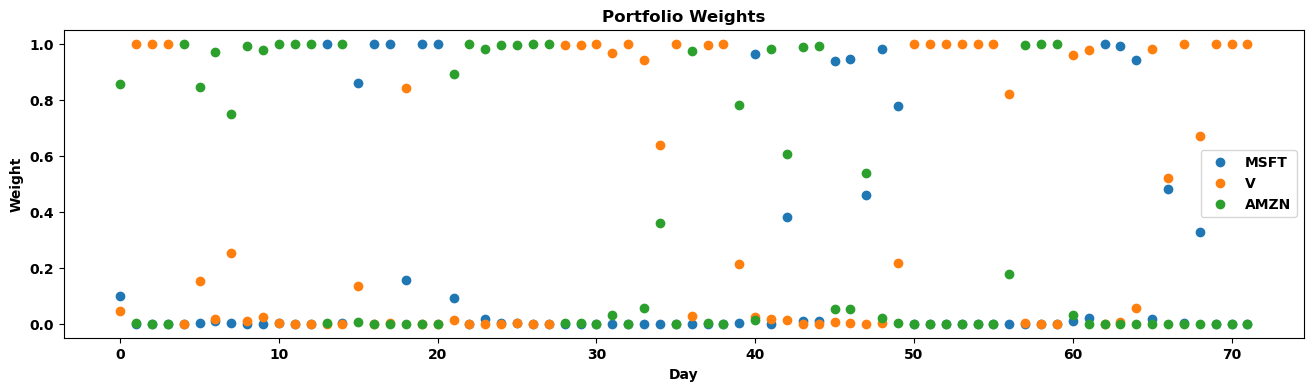

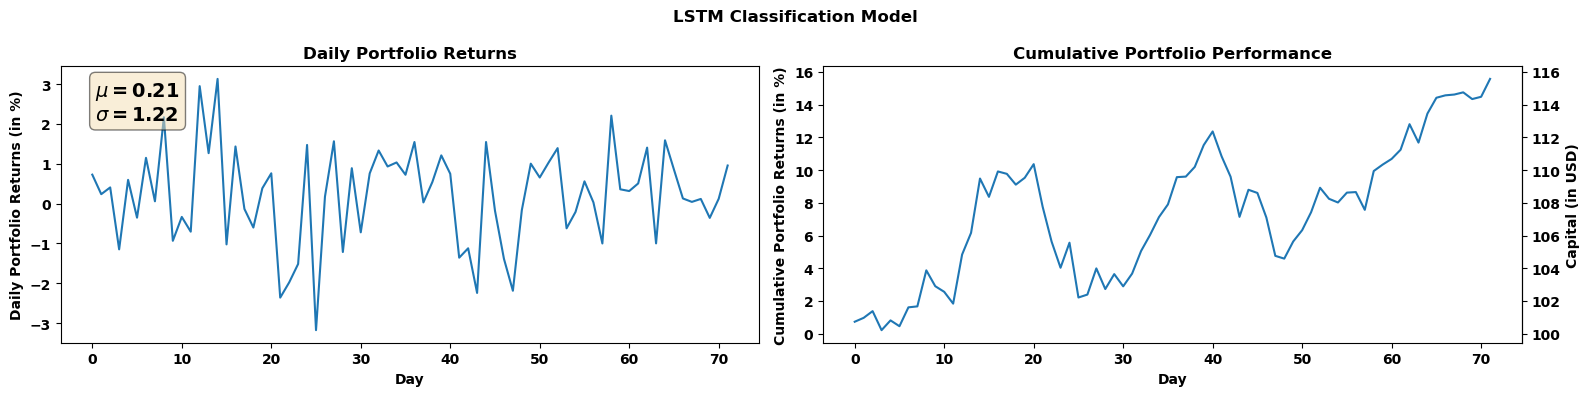

In [11]:
portfolio_optimizer.plot_portfolio_performance()

## Greedy Classifier

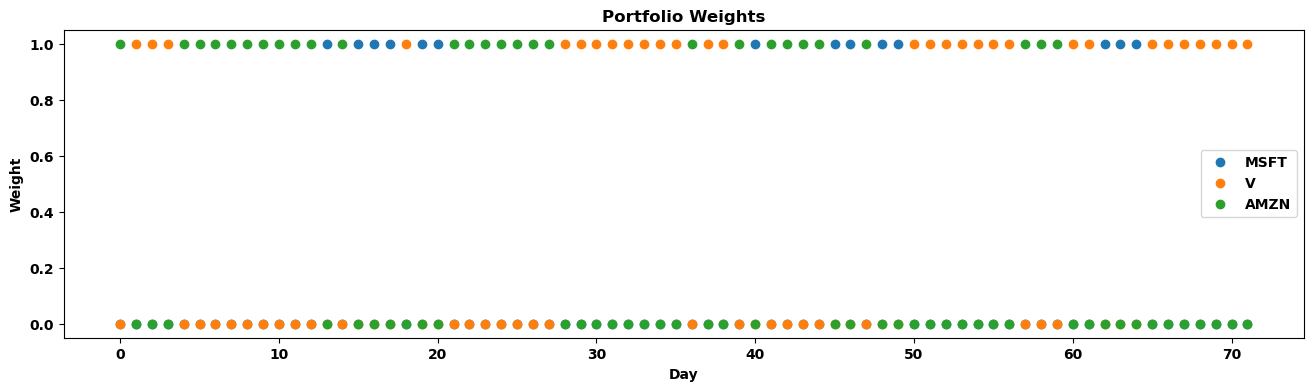

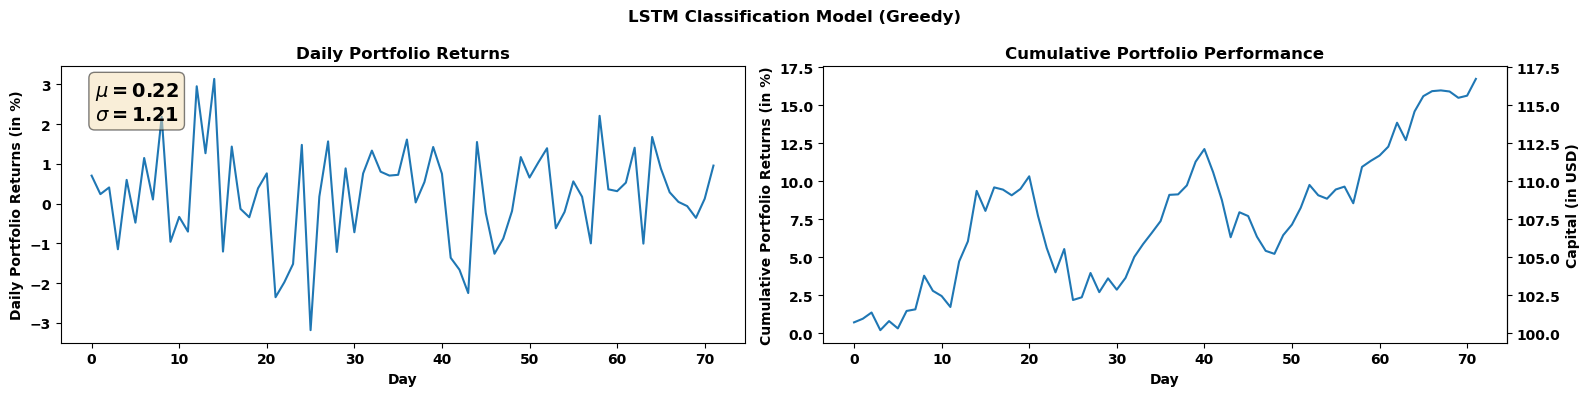

In [12]:
portfolio_optimizer.set_greedy_classification(True)
portfolio_optimizer.plot_portfolio_performance()